In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow import keras
from tensorflow.keras.layers import Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
import sys
sys.path.append("../")
from Utils.common_function import common_Fucnation,train_and_evaluate_model,train_and_evaluate_multiple_models

In [2]:
data = pd.read_csv("customer_feedback_satisfaction.csv")
comm_fun = common_Fucnation()

In [3]:
data = comm_fun.all_label_encode(data=data)

<Axes: xlabel='SatisfactionScore'>

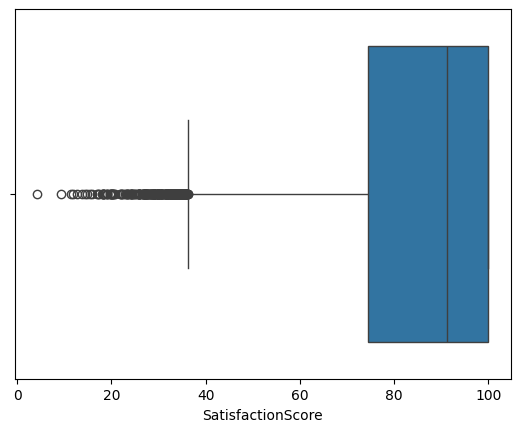

In [4]:
sns.boxplot(x = 'SatisfactionScore',data = data)

In [5]:
data = comm_fun.remove_outliers(data=data,column='SatisfactionScore')

<Axes: xlabel='SatisfactionScore'>

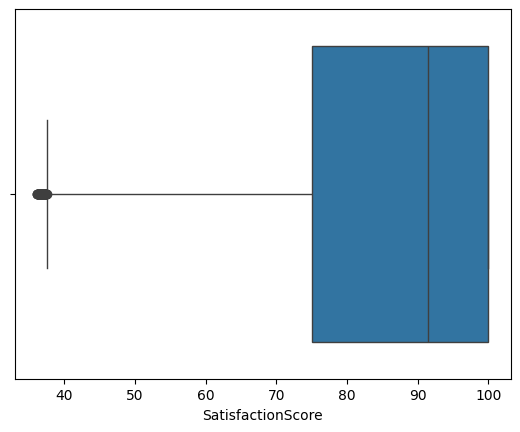

In [6]:
sns.boxplot(x = 'SatisfactionScore',data = data)

In [7]:
X = data.drop(columns=['SatisfactionScore', 'CustomerID'])
y = data['SatisfactionScore']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
# from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

models = [
    # Classifier
    RandomForestClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    KNeighborsClassifier(),
    # Regressor
    RandomForestRegressor(),
    LinearRegression(),
    DecisionTreeRegressor(),
    # SVR(),
    KNeighborsRegressor()
]

results_reg = train_and_evaluate_multiple_models(models[5:], X_train, X_test, y_train, y_test)

Model: RandomForestRegressor (Regressor) -> R² Score: 0.7568946846155722
Model: LinearRegression (Regressor) -> R² Score: 0.6925935324171548
Model: DecisionTreeRegressor (Regressor) -> R² Score: 0.5336989563255259
Model: KNeighborsRegressor (Regressor) -> R² Score: -0.04326888432410292
